 What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?
We want to know the relationship between our advertising techniques, which technique generate more sales? which technique does not ?

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [44]:
#Import necessary libraries for your analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
df = pd.read_csv("Advertising.csv")

In [46]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [47]:
#Calculate total spent
df['total_spent']  = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


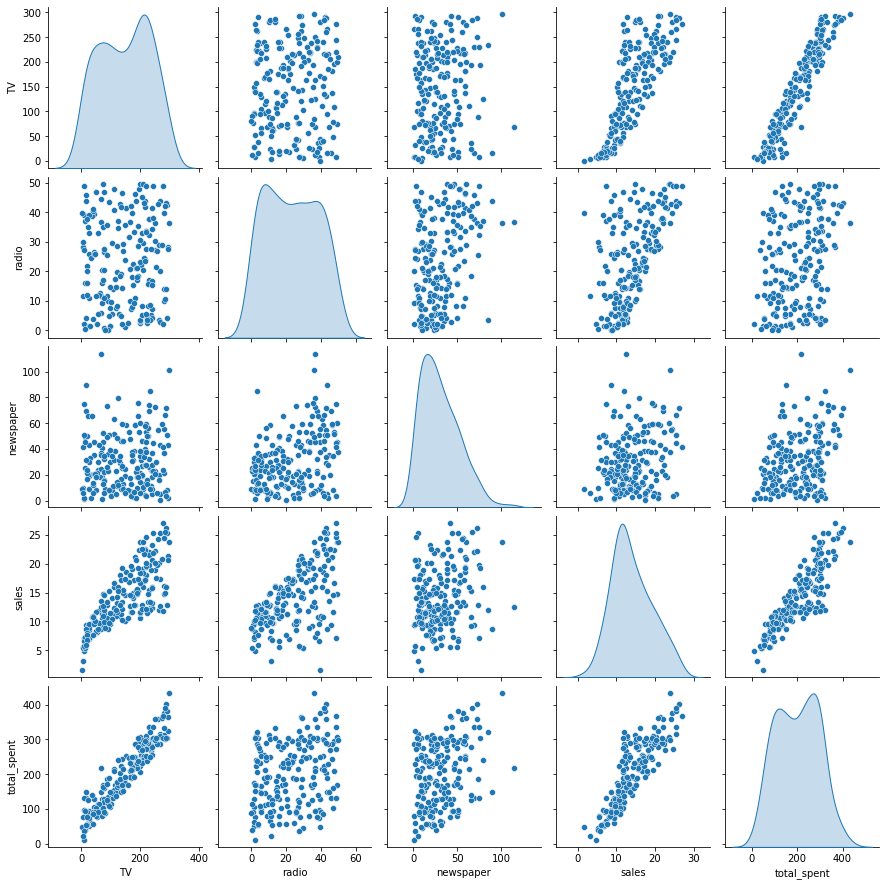

In [48]:
# Relationship between features by displaying a pairplot
sns.pairplot(df,diag_kind='kde')

<AxesSubplot:xlabel='total_spent', ylabel='sales'>

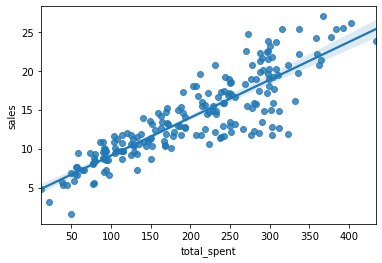

In [49]:
#A scatter plot showing the relationship between total spent and sales
sns.regplot(data=df, x='total_spent', y='sales')

In [50]:
#features(X) or independent variables
X = df.drop(['sales', 'total_spent'], axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [51]:
#Define your label(y)
y = df['sales']

In [52]:
#import train_test_split from model selection
from sklearn.model_selection import train_test_split

In [53]:
#Split the data into training data(70%) and test data(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
#import Linear regression algorithm from the linear model 
from sklearn.linear_model import LinearRegression

In [55]:
#Create an instance of the model
model = LinearRegression()

In [56]:
#Fit your model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [57]:
#Predict using the test data on the model
test_predictions = model.predict(X_test)

In [58]:
#These are the predicted sales of the test datasets
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [59]:
#We have to check the performance of our model using a performance metrics, Root Mean Squared error
#import mean squared error
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [60]:
df['sales'].mean()

14.022500000000003

In [61]:
#Checking the error using RMSE
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

1.5161519375993882

Let us check is our model was good, or if Linear regression was a good model 
To do that we have to know our residual errors
Our residual error can be known by taking the difference between our test predictions and our test data 

In [75]:
#Caluculate test residuals
test_res = y_test - test_predictions

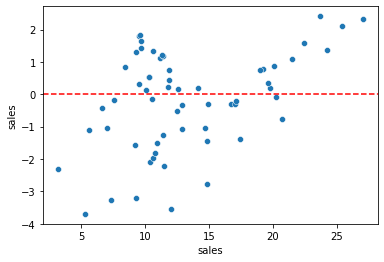

In [63]:
#A scatter plot to show us test residuals against the y_test
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [64]:
#Check the length of the residuals
len(test_res)

60

Let us now predict using all our datasets before deploying our model to real world

In [65]:
#An instance of the final model
final_model = LinearRegression()

In [66]:
#Fit on all your datasets
final_model.fit(X,y)

LinearRegression()

In [67]:
#Predict on all the data
y_hat = final_model.predict(X)

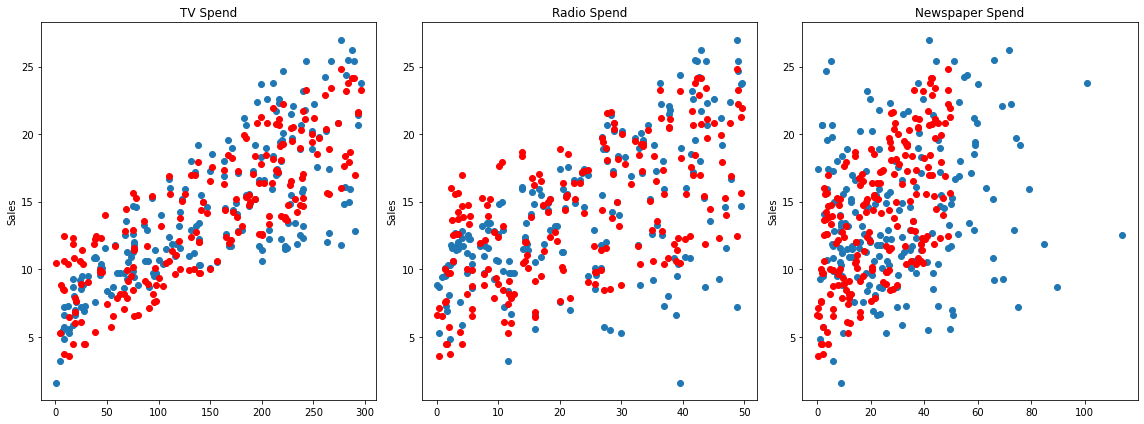

In [68]:
#A scatter plot to show the relationship between the predicted values and actual values
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [69]:
#calculating residual error
residuals = y_hat - y

Let us the model coefficient for all our advertisement technique

In [70]:
#Final model coefficients
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [71]:
#creating a dataframe for the coefficients
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


How do we interpret the model coefficients 


TV
It means that for a 1 unit increase in TV spent will result in a 0.045 sales unit increase which in this case it is 1000s of unit
For every $1000 dollars spend on TV advertisement, we could expect 45 more units sold.

Radio
It means that for a 1 unit increase in TV spent will result in a 0.188  sales unit increase which in this case it is 1000s of unit
For every $1000 dollars spend on Radio advertisement, we could expect 188 more units sold.

Newspaper
It means that for a 1 unit increase in TV spent will result in a 0.001  sales unit increase which in this case it is 1000s of unit
For every $1000 dollars spend on Newspaper advertisement.we could actually expect to sell 1 less unit. It occurs that Newspaper have little or no effect on our sales so a company can decide to stop using Newspaper for advertisement

Let us test the model on a new dataset 

The next advertisement will be campaign and have a total spend of 80k on TV, 25k on Radio, and 28k on Newspaper Ads, how many units could we expect to sell as a result of this?

In [72]:
campaign = [[80,25,12]]

In [74]:
final_model.predict(campaign)

array([11.30086151])

For the campaign advertisment using the above datasets, the model predicted 11 units in sales